In [1]:
import requests
from requests.exceptions import RequestException
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from typing import List, Dict, Union
from collections import Counter
from funcs import *

In [2]:
url = "https://data.police.uk/api/stops-force"

In [3]:
forces = requests.get("https://data.police.uk/api/forces").json()

[88, 90, 86]


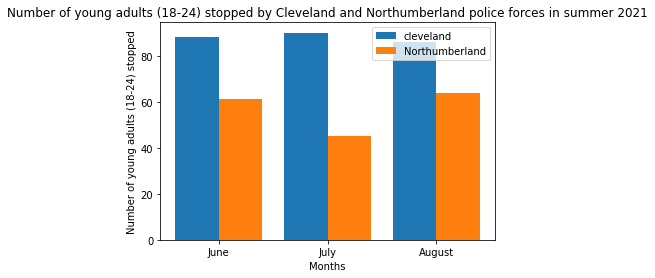

In [4]:
cle = []
north = []

for m in ["2021-06", "2021-07", "2021-08"]:
    cle.append(young_adults(url=url, params={"force": "cleveland", "date": m}, age_range="18-24"))
    north.append(young_adults(url=url, params={"force": "northumbria", "date": m}, age_range="18-24"))

X = np.arange(len(cle))
ticks = ["June", "July", "August"]
plt.bar(X - 0.2, cle, 0.4, label="cleveland")
plt.bar(X + 0.2, north, 0.4, label = "Northumberland")
plt.xticks(X, ticks)
plt.xlabel("Months")
plt.ylabel("Number of young adults (18-24) stopped")
plt.title("Number of young adults (18-24) stopped by Cleveland and Northumberland police forces in summer 2021")
plt.legend()

print(cle)

{'18-24': 88, '10-17': 40, 'Unspecified': 52, 'over 34': 176, '25-34': 116}


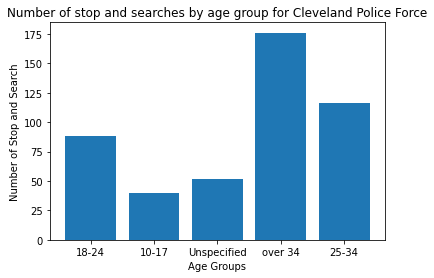

In [5]:
ag = age_breakdown(url=url, params={"force": "cleveland", "date": "2021-06"})
ag = {"Unspecified" if k == None else k:v for k,v in ag.items()}

plt.bar(list(ag.keys()), list(ag.values()))
plt.title("Number of stop and searches by age group for Cleveland Police Force")
plt.xlabel("Age Groups")
plt.ylabel("Number of Stop and Search")

print(ag)

Text(0, 0.5, 'Number of Stop and Search')

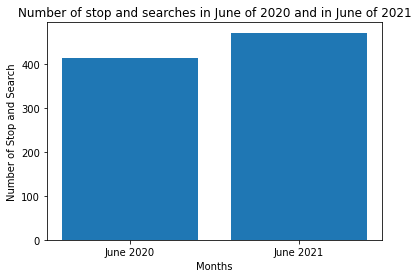

In [6]:
first = get_data(url=url, params={"force": "cleveland", "date": "2020-06"})
second = get_data(url=url, params={"force": "cleveland", "date": "2021-06"})

plt.bar(["June 2020", "June 2021"], [len(first), len(second)])
plt.title("Number of stop and searches in June of 2020 and in June of 2021")
plt.xlabel("Months")
plt.ylabel("Number of Stop and Search")

Text(0, 0.5, 'Number of Stop and Search That Led to Arrest')

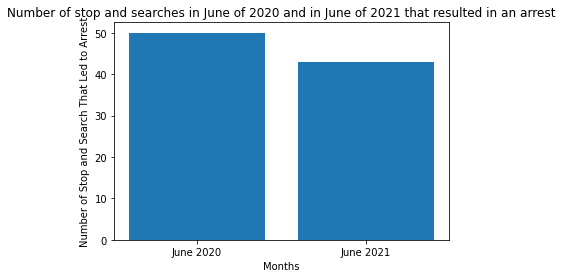

In [7]:
fi = [r for r in get_data(url=url, params={"force": "cleveland", "date": "2020-06"}) if r["outcome"] == "Arrest"]
se = [r for r in get_data(url=url, params={"force": "cleveland", "date": "2021-06"}) if r["outcome"] == "Arrest"]

plt.bar(["June 2020", "June 2021"], [len(fi), len(se)])
plt.title("Number of stop and searches in June of 2020 and in June of 2021 that resulted in an arrest")
plt.xlabel("Months")
plt.ylabel("Number of Stop and Search That Led to Arrest")

Counter({'Male': 358, 'Female': 65, 'Unspecified': 49})


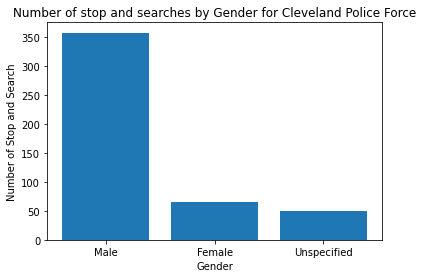

In [8]:
gen = gender_stop(url=url, params={"force": "cleveland", "date": "2021-06"})

plt.bar(list(gen.keys()), list(gen.values()))
plt.title("Number of stop and searches by Gender for Cleveland Police Force")
plt.xlabel("Gender")
plt.ylabel("Number of Stop and Search")

print(gen)

In [9]:
get_data(url=url, params={"force": "cleveland", "date": "2020-06"})

[{'age_range': None,
  'outcome': 'A no further action disposal',
  'involved_person': True,
  'self_defined_ethnicity': None,
  'gender': None,
  'legislation': 'Misuse of Drugs Act 1971 (section 23)',
  'outcome_linked_to_object_of_search': None,
  'datetime': '2020-06-20T21:22:51+00:00',
  'removal_of_more_than_outer_clothing': None,
  'outcome_object': {'id': 'bu-no-further-action',
   'name': 'A no further action disposal'},
  'location': {'latitude': '54.619397',
   'street': {'id': 594489, 'name': 'On or near Majuba Road'},
   'longitude': '-1.080242'},
  'operation': None,
  'officer_defined_ethnicity': None,
  'type': 'Person search',
  'operation_name': None,
  'object_of_search': 'Controlled drugs'},
 {'age_range': 'over 34',
  'outcome': 'A no further action disposal',
  'involved_person': True,
  'self_defined_ethnicity': 'White - English/Welsh/Scottish/Northern Irish/British',
  'gender': 'Male',
  'legislation': 'Misuse of Drugs Act 1971 (section 23)',
  'outcome_linked_